# 상장회사 재무제표 및 뉴스 크롤링을 통한 데이터 분석

## 기본 정보

KT - 종목코드 : 030200

네이버 금융 > 종목코드로 검색 > 중간에 "종합정보" 있는 탭에서 "종목분석" 선택 > 아래에 "Financial Summary" 부분이 재무제표

http://finance.naver.com/item/coinfo.nhn?code=030200

## Financial Summary 영역

iframe 으로 구성되어 있음. iframe의 src 링크 참조.

http://companyinfo.stock.naver.com/v1/company/c1010001.aspx?cmp_cd=030200

![img](./images/finsum0001.jpg)

Financial Summary에서 "연간" 선택 > "검색" 클릭

![img](./images/finsum0002.jpg)

![img](./images/finsum0003.jpg)

검색 버튼 클릭시 실제로 요청하는 URL은 다음과 같다. 이 URL이 크롤링에 필요한 주소이다.

http://companyinfo.stock.naver.com/v1/company/ajax/cF1001.aspx?cmp_cd=030200&fin_typ=0&freq_typ=Y

* cmp_cd : 종목코드
* fin_typ : 0 주재무제표     --- 여기서는 0으로 fix
* freq_typ : Y 연간, Q 분기  --- 여기서는 Y로 fix

## 재무제표 데이터 크롤링

크롤링 목표 페이지가 테이블 형태이므로 pandas를 사용한다.

In [1]:
import pandas as pd

In [2]:
itemcode = '030200'
url = 'http://companyinfo.stock.naver.com/v1/company/ajax/cF1001.aspx?cmp_cd={}&fin_typ=0&freq_typ=Y'.format(itemcode)

In [3]:
data = pd.read_html(url, encoding='utf-8')
fin_df = data[0]
fin_df = fin_df.set_index('주요재무정보')  # index
fin_df

,연간,2012/12 (IFRS연결),2013/12 (IFRS연결),2014/12 (IFRS연결),2015/12 (IFRS연결),2016/12 (IFRS연결),2017/12(E) (IFRS연결),2018/12(E) (IFRS연결),2019/12(E) (IFRS연결)
주요재무정보,,,,,,,,,
매출액,2.385640e+05,2.381060e+05,2.231170e+05,2.228120e+05,2.274370e+05,230290.00,234995.00,239786.00,NaN
영업이익,1.209200e+04,8.393000e+03,-4.066000e+03,1.292900e+04,1.440000e+04,15269.00,16257.00,17056.00,NaN
세전계속사업이익,1.414800e+04,-5.300000e+01,-1.328600e+04,7.195000e+03,1.127000e+04,12247.00,13527.00,14791.00,NaN
당기순이익,1.105400e+04,-6.030000e+02,-9.662000e+03,6.313000e+03,7.978000e+03,9010.00,10050.00,11077.00,NaN
당기순이익(지배),1.046100e+04,-1.624000e+03,-1.055000e+04,5.530000e+03,7.111000e+03,8259.00,9252.00,10288.00,NaN
당기순이익(비지배),5.930000e+02,1.022000e+03,8.880000e+02,7.830000e+02,8.680000e+02,NaN,NaN,NaN,NaN
자산총계,3.455790e+05,3.484650e+05,3.377550e+05,2.934120e+05,3.058770e+05,308399.00,314348.00,322161.00,NaN
부채총계,2.133990e+05,2.198160e+05,2.198520e+05,1.717570e+05,1.779300e+05,173337.00,171659.00,171296.00,NaN
자본총계,1.321800e+05,1.286490e+05,1.179030e+05,1.216550e+05,1.279480e+05,134746.00,142324.00,150468.00,NaN


### DataFrame 정리

* '연간'이 컬럼명으로 들어가면서 컬럼이 하나씩 밀렸다. 
* '연간'을 삭제한다.

In [4]:
colnames = list(fin_df.columns)   # 컬럼명을 리스트로 가져온다.
colnames.remove('연간')
colnames

['\n\t\t\t\t\t\t\t\t\t2012/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2013/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2014/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2015/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2016/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2017/12(E)\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2018/12(E)\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2019/12(E)\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t']

* 나머지 컬럼명에서 '년/월' 정보만 추출. / 기호를 - 로 변경.

In [5]:
import re
from datetime import datetime

In [6]:
def get_date_str(s):
    date_str = ''
    r = re.search("\d{4}/\d{2}", s)
    if r:
        date_str = r.group()
        date_str = date_str.replace('/', '-')
        
    return date_str

In [7]:
colnames = [get_date_str(x) for x in colnames]
colnames

['2012-12',
 '2013-12',
 '2014-12',
 '2015-12',
 '2016-12',
 '2017-12',
 '2018-12',
 '2019-12']

In [8]:
fin_df = fin_df.ix[:, :-1]   # 밀려서 생긴 마지막 컬럼 제외
fin_df.columns = colnames
fin_df.head()

,2012-12,2013-12,2014-12,2015-12,2016-12,2017-12,2018-12,2019-12
주요재무정보,,,,,,,,
매출액,238564.0,238106.0,223117.0,222812.0,227437.0,230290.0,234995.0,239786.0
영업이익,12092.0,8393.0,-4066.0,12929.0,14400.0,15269.0,16257.0,17056.0
세전계속사업이익,14148.0,-53.0,-13286.0,7195.0,11270.0,12247.0,13527.0,14791.0
당기순이익,11054.0,-603.0,-9662.0,6313.0,7978.0,9010.0,10050.0,11077.0
당기순이익(지배),10461.0,-1624.0,-10550.0,5530.0,7111.0,8259.0,9252.0,10288.0


## 년도 기준으로 데이터 변환

In [9]:
trans_df = fin_df.T
trans_df.rename(columns={'주요재무정보':'date'}, inplace=True)
trans_df.index = pd.to_datetime(trans_df.index)
trans_df

주요재무정보,매출액,영업이익,세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),...,부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
2012-12-01,238564.0,12092.0,14148.0,11054.0,10461.0,593.0,345579.0,213399.0,132180.0,123092.0,...,161.45,772.56,4006.0,8.86,50505.0,0.70,2000.0,5.63,46.60,261111808.0
2013-12-01,238106.0,8393.0,-53.0,-603.0,-1624.0,1022.0,348465.0,219816.0,128649.0,117552.0,...,170.87,734.24,-622.0,-50.72,48199.0,0.65,800.0,2.54,-120.12,261111808.0
2014-12-01,223117.0,-4066.0,-13286.0,-9662.0,-10550.0,888.0,337755.0,219852.0,117903.0,103410.0,...,186.47,639.91,-4040.0,-7.73,42232.0,0.74,0.0,0.00,0.00,261111808.0
2015-12-01,222812.0,12929.0,7195.0,6313.0,5530.0,783.0,293412.0,171757.0,121655.0,108451.0,...,141.18,671.30,2118.0,13.34,44293.0,0.64,500.0,1.77,22.14,261111808.0
2016-12-01,227437.0,14400.0,11270.0,7978.0,7111.0,868.0,305877.0,177930.0,127948.0,114419.0,...,139.06,709.33,2723.0,10.80,46707.0,0.63,800.0,2.72,27.56,261111808.0
2017-12-01,230290.0,15269.0,12247.0,9010.0,8259.0,NaN,308399.0,173337.0,134746.0,120818.0,...,128.64,NaN,3163.0,10.07,49319.0,0.65,941.0,2.95,0.30,NaN
2018-12-01,234995.0,16257.0,13527.0,10050.0,9252.0,NaN,314348.0,171659.0,142324.0,127766.0,...,120.61,NaN,3543.0,8.99,52155.0,0.61,1078.0,3.38,0.30,NaN
2019-12-01,239786.0,17056.0,14791.0,11077.0,10288.0,NaN,322161.0,171296.0,150468.0,135199.0,...,113.84,NaN,3940.0,8.08,55189.0,0.58,1184.0,3.72,0.30,NaN


In [10]:
trans_df.columns

Index(['매출액', '영업이익', '세전계속사업이익', '당기순이익', '당기순이익(지배)', '당기순이익(비지배)', '자산총계',
       '부채총계', '자본총계', '자본총계(지배)', '자본총계(비지배)', '자본금', '영업활동현금흐름', '투자활동현금흐름',
       '재무활동현금흐름', 'CAPEX', 'FCF', '이자발생부채', '영업이익률', '순이익률', 'ROE(%)',
       'ROA(%)', '부채비율', '자본유보율', 'EPS(원)', 'PER(배)', 'BPS(원)', 'PBR(배)',
       '현금DPS(원)', '현금배당수익률', '현금배당성향(%)', '발행주식수(보통주)'],
      dtype='object', name='주요재무정보')

In [11]:
# 단위 : 억원
# % : 영업이익률, 순이익률, ROE, ROA, 부채비율, 자본유보율, 현금배당수익률, 현금배당성향
# 배 : PER, PBR
# 원 : EPS, BPS, 현금DPS

In [12]:
colnames = ['sales','biz_profit','net_profit','assets','debts','gross_capital','capital','cash_oper','cash_invest',
            'cash_finance','capex','fcf','debt_interest','rob','ron','roe','roa','debt_ratio','reserve_ratio',
            'eps','per','bps','pbr','dps','d_profit','d_tendency','totalshares']

In [13]:
# 필요한 컬럼만 추출
summary_df = trans_df[['매출액','영업이익','당기순이익','자산총계','부채총계','자본총계','자본금','영업활동현금흐름','투자활동현금흐름',
                       '재무활동현금흐름','CAPEX','FCF','이자발생부채','영업이익률','순이익률','ROE(%)','ROA(%)','부채비율','자본유보율',
                       'EPS(원)','PER(배)','BPS(원)','PBR(배)','현금DPS(원)','현금배당수익률','현금배당성향(%)','발행주식수(보통주)']]
# 컬럼명 영문으로 변경
summary_df.columns = colnames
summary_df

,sales,biz_profit,net_profit,assets,debts,gross_capital,capital,cash_oper,cash_invest,cash_finance,...,debt_ratio,reserve_ratio,eps,per,bps,pbr,dps,d_profit,d_tendency,totalshares
2012-12-01,238564.0,12092.0,11054.0,345579.0,213399.0,132180.0,15645.0,57255.0,-38512.0,-12778.0,...,161.45,772.56,4006.0,8.86,50505.0,0.70,2000.0,5.63,46.60,261111808.0
2013-12-01,238106.0,8393.0,-603.0,348465.0,219816.0,128649.0,15645.0,41111.0,-37826.0,-3118.0,...,170.87,734.24,-622.0,-50.72,48199.0,0.65,800.0,2.54,-120.12,261111808.0
2014-12-01,223117.0,-4066.0,-9662.0,337755.0,219852.0,117903.0,15645.0,19164.0,-31710.0,10717.0,...,186.47,639.91,-4040.0,-7.73,42232.0,0.74,0.0,0.00,0.00,261111808.0
2015-12-01,222812.0,12929.0,6313.0,293412.0,171757.0,121655.0,15645.0,42300.0,-24019.0,-11640.0,...,141.18,671.30,2118.0,13.34,44293.0,0.64,500.0,1.77,22.14,261111808.0
2016-12-01,227437.0,14400.0,7978.0,305877.0,177930.0,127948.0,15645.0,47708.0,-34850.0,-9433.0,...,139.06,709.33,2723.0,10.80,46707.0,0.63,800.0,2.72,27.56,261111808.0
2017-12-01,230290.0,15269.0,9010.0,308399.0,173337.0,134746.0,15643.0,40216.0,-33823.0,-4253.0,...,128.64,NaN,3163.0,10.07,49319.0,0.65,941.0,2.95,0.30,NaN
2018-12-01,234995.0,16257.0,10050.0,314348.0,171659.0,142324.0,15643.0,44207.0,-33559.0,-4765.0,...,120.61,NaN,3543.0,8.99,52155.0,0.61,1078.0,3.38,0.30,NaN
2019-12-01,239786.0,17056.0,11077.0,322161.0,171296.0,150468.0,15643.0,45670.0,-33246.0,-5116.0,...,113.84,NaN,3940.0,8.08,55189.0,0.58,1184.0,3.72,0.30,NaN


## 위 내용을 하나의 함수로 묶는다.

In [14]:
def get_finstate_year(code):
    url = 'http://companyinfo.stock.naver.com/v1/company/ajax/cF1001.aspx?cmp_cd={}&fin_typ=0&freq_typ=Y'.format(code)

    data = pd.read_html(url, encoding='utf-8')
    fin_df = data[0]
    fin_df = fin_df.set_index('주요재무정보')  # index
    
    colnames = list(fin_df.columns)
    colnames.remove('연간')
    colnames = [get_date_str(x) for x in colnames]

    fin_df = fin_df.ix[:, :-1]   # 밀려서 생긴 마지막 컬럼 제거
    fin_df.columns = colnames

    trans_df = fin_df.T
    trans_df.rename(columns={'주요재무정보':'date'}, inplace=True)
    trans_df.index = pd.to_datetime(trans_df.index)

    colnames = ['sales','biz_profit','net_profit','assets','debts','gross_capital','capital','cash_oper','cash_invest',
            'cash_finance','capex','fcf','debt_interest','rob','ron','roe','roa','debt_ratio','reserve_ratio',
            'eps','per','bps','pbr','dps','d_profit','d_tendency','totalshares']

    summary_df = trans_df[['매출액','영업이익','당기순이익','자산총계','부채총계','자본총계','자본금','영업활동현금흐름','투자활동현금흐름',
                       '재무활동현금흐름','CAPEX','FCF','이자발생부채','영업이익률','순이익률','ROE(%)','ROA(%)','부채비율','자본유보율',
                       'EPS(원)','PER(배)','BPS(원)','PBR(배)','현금DPS(원)','현금배당수익률','현금배당성향(%)','발행주식수(보통주)']]

    # 컬럼명 영문으로 변경
    summary_df.columns = colnames

    return summary_df

In [15]:
# SK 텔레콤
df1 = get_finstate_year('017670')
df1

,sales,biz_profit,net_profit,assets,debts,gross_capital,capital,cash_oper,cash_invest,cash_finance,...,debt_ratio,reserve_ratio,eps,per,bps,pbr,dps,d_profit,d_tendency,totalshares
2012-12-01,161414.0,17300.0,11157.0,255956.0,127408.0,128548.0,446.0,39997.0,-53096.0,5853.0,...,99.11,33693.37,14263.0,10.69,170095.0,0.90,9400.0,6.16,56.88,80745711.0
2013-12-01,166021.0,20111.0,16095.0,265765.0,124100.0,141666.0,446.0,35586.0,-25065.0,-5732.0,...,87.60,35884.28,20298.0,11.33,189640.0,1.21,9400.0,4.09,40.66,80745711.0
2014-12-01,171638.0,18251.0,17993.0,279412.0,126930.0,152483.0,446.0,36774.0,-36832.0,-5594.0,...,83.24,38317.34,22307.0,12.01,204504.0,1.31,9400.0,3.51,37.02,80745711.0
2015-12-01,171367.0,17080.0,15159.0,285814.0,132073.0,153741.0,446.0,37781.0,-28805.0,-9646.0,...,85.91,40152.14,18807.0,11.46,215993.0,1.00,10000.0,4.64,46.63,80745711.0
2016-12-01,170918.0,15357.0,16601.0,312977.0,151812.0,161164.0,446.0,42432.0,-24622.0,-10448.0,...,94.20,42270.33,20756.0,10.79,226194.0,0.99,10000.0,4.46,42.13,80745711.0
2017-12-01,173345.0,16471.0,21838.0,323458.0,146050.0,176842.0,448.0,41338.0,-25898.0,-8823.0,...,82.59,NaN,27422.0,8.97,249742.0,0.99,10062.0,4.09,0.37,NaN
2018-12-01,177590.0,17578.0,22293.0,338024.0,145892.0,191574.0,448.0,45715.0,-27794.0,-8568.0,...,76.15,NaN,28181.0,8.73,271568.0,0.91,10188.0,4.14,0.36,NaN
2019-12-01,182125.0,18703.0,22974.0,351998.0,144868.0,206567.0,448.0,47352.0,-28040.0,-11320.0,...,70.13,NaN,29103.0,8.45,293607.0,0.84,10250.0,4.17,0.35,NaN


In [16]:
# LG U+
df2 = get_finstate_year('032640')
df2

,sales,biz_profit,net_profit,assets,debts,gross_capital,capital,cash_oper,cash_invest,cash_finance,...,debt_ratio,reserve_ratio,eps,per,bps,pbr,dps,d_profit,d_tendency,totalshares
2012-12-01,109046.0,1268.0,-596.0,110887.0,73402.0,37485.0,25740.0,18747.0,-19856.0,3334.0,...,195.82,46.00,-122.0,-63.85,8582.0,0.91,0.0,0.00,0.00,436611361.0
2013-12-01,114503.0,5421.0,2795.0,117750.0,77524.0,40226.0,25740.0,17777.0,-19622.0,2415.0,...,192.72,56.49,640.0,16.79,9209.0,1.17,150.0,1.40,23.43,436611361.0
2014-12-01,109998.0,5763.0,2277.0,120127.0,78348.0,41778.0,25740.0,20154.0,-23073.0,3095.0,...,187.53,62.22,523.0,22.00,9567.0,1.20,150.0,1.30,28.70,436611361.0
2015-12-01,107952.0,6323.0,3512.0,119510.0,75026.0,44484.0,25740.0,17929.0,-15107.0,-4060.0,...,168.66,72.76,805.0,12.92,10187.0,1.02,250.0,2.40,31.06,436611361.0
2016-12-01,114510.0,7465.0,4927.0,119891.0,71628.0,48263.0,25740.0,22248.0,-14923.0,-7073.0,...,148.41,87.45,1129.0,10.15,11054.0,1.04,350.0,3.06,31.01,436611361.0
2017-12-01,118624.0,8021.0,5385.0,122256.0,70075.0,52180.0,25740.0,22268.0,-15123.0,-3251.0,...,134.29,NaN,1227.0,13.16,11942.0,1.35,377.0,2.34,0.31,NaN
2018-12-01,122305.0,8610.0,5935.0,124791.0,68331.0,56461.0,25740.0,22866.0,-15348.0,-3912.0,...,121.02,NaN,1358.0,11.89,12931.0,1.25,416.0,2.58,0.31,NaN
2019-12-01,126052.0,9198.0,6521.0,128407.0,67414.0,60993.0,25740.0,24661.0,-15681.0,-3835.0,...,110.53,NaN,1490.0,10.84,13978.0,1.16,464.0,2.87,0.31,NaN


## 통신 3사 비교 - 영업이익률

In [17]:
temp_dict = {'KT':summary_df['rob'], 'SK':df1['rob'], 'LG':df2['rob']}
df_rob = pd.DataFrame(temp_dict)
df_rob

,KT,LG,SK
2012-12-01,5.07,1.16,10.72
2013-12-01,3.52,4.74,12.11
2014-12-01,-1.82,5.24,10.63
2015-12-01,5.80,5.86,9.97
2016-12-01,6.33,6.52,8.98
2017-12-01,6.63,6.76,9.50
2018-12-01,6.92,7.04,9.90
2019-12-01,7.11,7.30,10.27


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams["font.family"] = 'D2Coding'
plt.rcParams["font.size"] = 11

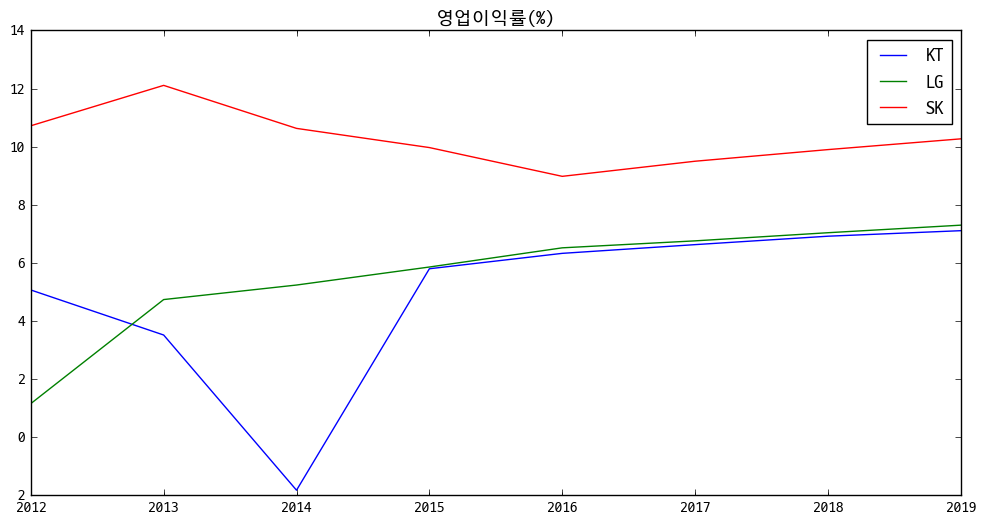

In [20]:
df_rob.plot()
plt.title('영업이익률(%)')

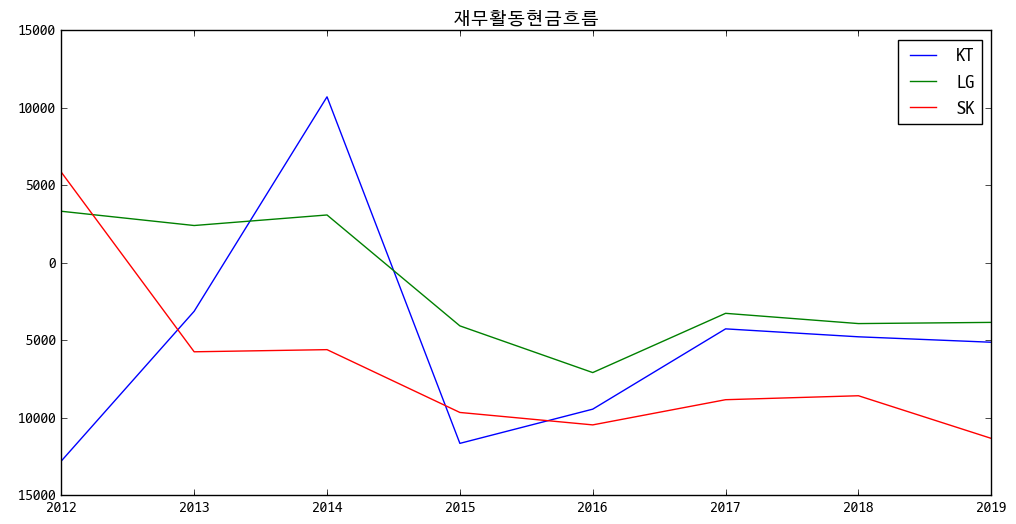

In [21]:
temp_dict = {'KT':summary_df['cash_finance'], 'SK':df1['cash_finance'], 'LG':df2['cash_finance']}
df_roe = pd.DataFrame(temp_dict)
df_roe.plot()
plt.title('재무활동현금흐름')

## 2014년에 KT에 어떤 큰 사건이 있었는지 뉴스로 확인해본다.

In [22]:
import requests
import lxml.html
import tqdm
from urllib.parse import quote_plus

In [23]:
query = 'KT+030200'
query_percent = quote_plus(query.encode('cp949'))

In [24]:
url = ('http://news.naver.com/main/search/search.nhn?refresh=&so=datetime.dsc&stPhoto=&stPaper='
       '&stRelease=&ie=MS949&detail=0&rcsection=&sm=all.basic&pd=4&'
       'query={query}&startDate={start}&endDate={end}&page={page}')

In [25]:
page_url = url.format(query=query_percent, start='2014-01-01', end='2014-06-01', page=1)
page_url

'http://news.naver.com/main/search/search.nhn?refresh=&so=datetime.dsc&stPhoto=&stPaper=&stRelease=&ie=MS949&detail=0&rcsection=&sm=all.basic&pd=4&query=KT%2B030200&startDate=2014-01-01&endDate=2014-06-01&page=1'

### 네이버 뉴스 크롤링

In [26]:
articles = []
for page in tqdm.tqdm_notebook(range(1, 110)):
    page_url = url.format(query=query_percent, start='2014-01-01', end='2014-04-01', page=page)
    res = requests.get(page_url)
    root = lxml.html.fromstring(res.text)
    titles = root.cssselect('a.go_naver')
    for title in titles:
        try:
            article_url = title.attrib['href']
            art_res = requests.get(article_url)
            art_root = lxml.html.fromstring(art_res.text)
            body = art_root.cssselect('#articleBodyContents')[0]            
            articles.append(body.text_content())
        except IndexError:
            pass

In [27]:
len(articles)

683

In [28]:
replaced_articles = []
for i in range(len(articles)):
    conts = articles[i].replace('flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}', '')
    conts = conts.replace('이데일리', '')
    conts = conts.replace('기자', '')
    conts = conts.replace('텔레콤', '')
    conts = conts.replace('종합 경제 뉴스', '')
    conts = conts.replace('김현아', '')
    conts = conts.replace('＜ⓒ종합 경제정보 미디어  - 무단전재 & 재배포 금지＞', '')
    conts = conts.replace('모바일 웹', '')
    conts = conts.replace('이동통신', '')
    conts = conts.replace('트래블러', '')
    conts = conts.replace('마켓포인트', '')
    conts = conts.replace('관계자', '')
    conts = conts.replace('회사', '')
    conts = conts.replace('기업', '')
    conts = conts.replace('부문', '')
    conts = conts.replace('분기', '')
    conts = conts.replace('한국', '')
    
    replaced_articles.append(conts)

In [29]:
replaced_articles[0]

'\n\t\n\t\n\n\n\n// \n\n\t\n\t3월  번호이동건수가 2009년 11월 이후 최저치를 기록했다. 사의 영업정지 제재 때문이다.통신사업자연합회(KOTA)은 지난달 알뜰폰을 포함한  번호이동건수가 총 59만2140건으로 집계됐다고 1일 밝혔다. 많은 보조금이 지급되면서 대란 소동까지 일으켰던 전달 129만7092건에 비하면 절반도 안되는 수준이다. 2009년 11월 52만3843건 이후 4년 3개월 만에 가장 적은 기록이기도 하다.사업자별로는 SK(017670)이 가장 많이 늘었다. 10만3364명이 순증했고, 알뜰폰을 포함하면 10만8880명 늘었다. 3사 중 지난달 13일부터 유일하게 신규 영업을 하고 있기 때문이다. 알뜰폰 사업자들은 전달보다 1만8078명 늘었다.반면 영업정지에 들어간 KT(030200)와 LG유플러스(032640)는 각각 6만6914명, 3만6450명 줄었다. 알뜰폰까지 포함하면 LG유플러스는 4만8641명, KT는 6만239명 줄었다.이달 5일부터 LG유플러스가 영업을 재개하면 이통사의 번호 이동 추이는 또다시 달라질 전망이다. LG유플러스는 5일부터 26일까지 신규 영업에 나선다. KT는 이달 26일까지, SK은 다음달 19일까지 신규 업업을 할 수 없다.[한동희  dwise@chosun.com]chosunbiz.com\n\n\t\n\t'

### 형태소 분석 & TDM

In [30]:
from konlpy.tag import Komoran
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
tagger = Komoran()  # 형태소 분석기

In [32]:
def get_noun(text):
    nouns = tagger.nouns(text)
    return [n for n in nouns if len(n) > 1]  # 2글자 이상인 명사만 추출

In [33]:
cv = CountVectorizer(tokenizer=get_noun, max_features=100)

In [34]:
tdm = cv.fit_transform(replaced_articles)

### 빈도순 단어 보기

In [35]:
import operator
import numpy as np

In [36]:
words = cv.get_feature_names()
count_mat = tdm.sum(axis=0)
count = np.squeeze(np.asarray(count_mat))
word_count = list(zip(words, count))
word_count = sorted(word_count, key=operator.itemgetter(1), reverse=True)
word_count[:50]

[('서비스', 965),
 ('통신', 583),
 ('제공', 573),
 ('회장', 561),
 ('시장', 546),
 ('고객', 545),
 ('사업', 529),
 ('유플러스', 522),
 ('영업정지', 491),
 ('보조금', 466),
 ('가입자', 445),
 ('개인정보', 408),
 ('이번', 402),
 ('지난해', 387),
 ('국내', 381),
 ('유출', 380),
 ('이용', 377),
 ('출시', 377),
 ('요금', 376),
 ('투자', 359),
 ('삼성전자', 347),
 ('때문', 343),
 ('관련', 335),
 ('사업자', 333),
 ('기술', 330),
 ('미래부', 311),
 ('단말기', 309),
 ('영업', 307),
 ('통신사', 302),
 ('업체', 298),
 ('번호', 293),
 ('조사', 291),
 ('데이터', 285),
 ('대출', 283),
 ('인터넷', 282),
 ('정보', 279),
 ('경우', 278),
 ('대비', 260),
 ('스마트폰', 257),
 ('기간', 251),
 ('방통위', 251),
 ('이상', 250),
 ('모바일', 244),
 ('사용', 243),
 ('개선', 241),
 ('정부', 240),
 ('실적', 234),
 ('예정', 234),
 ('지원', 230),
 ('기록', 227)]

### ------ 영업정지, 개인정보, 유출 등의 단어가 보인다.

### 워드 임베딩 & 차원 축소

In [37]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [38]:
svd = TruncatedSVD(n_components=10)
pos = svd.fit_transform(tdm.T)
pos.shape

(100, 10)

In [39]:
pos[0, :]

array([ 13.56928119,   0.51067971,   5.47746445,  -5.51330443,
        -3.38060865,  -1.21243301,   4.1516937 ,  -4.08058975,
       -10.31551012,   2.42188351])

In [40]:
words = [word for word, _ in word_count]
len(words)

100

In [41]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['font.size'] = 11
plt.rcParams['figure.figsize'] = [12, 6]

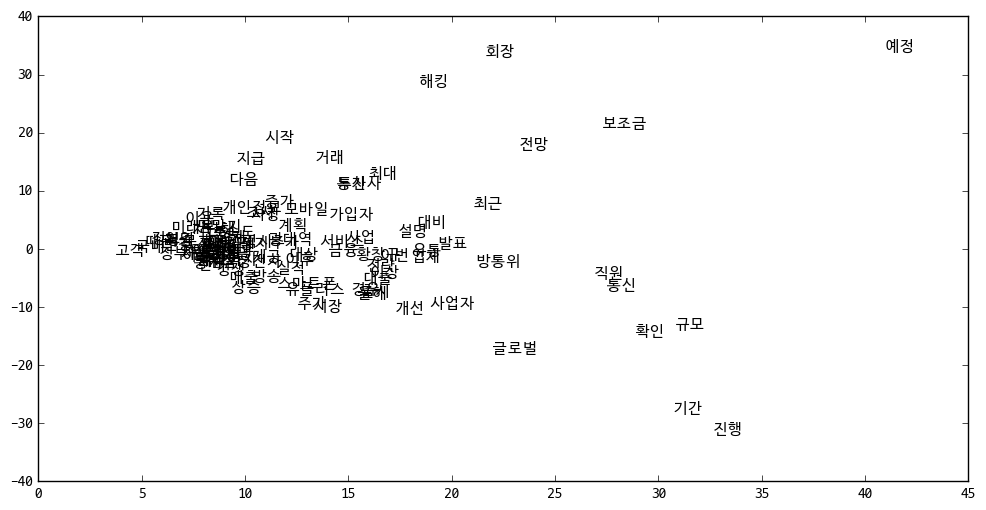

In [42]:
ax = plt.gca()
plt.scatter(pos[:, 0], pos[:, 1], marker='.', color='white')
for i, word in enumerate(words):
    ax.text(pos[i, 0], pos[i, 1], word)
plt.show()

### 해킹, 확인, 규모 등의 단어를 볼 수있다.